# **California District Housing Values: Model Building**

## **About the data**

### Data collection

Median house prices for *California districts* derived from the 1990 census.  The [dataset](https://www.kaggle.com/datasets/harrywang/housing?resource=download), derived from research by ***Pace, R. Kelley, and Ronald Barry in their 1997 paper "Sparse Spatial Autoregressions,"*** offers a historical lens through which we can understand and project housing market trends. Each observation represents a block group—a small geographical unit that serves as the foundation for building a model with significant practical applications. The block group can be defined as a district for easier interpretation.

### Feature Information

1. **longitude**: A measure of how far west a house is; a higher value is farther west

2. **latitude**: A measure of how far north a house is; a higher value is farther north

3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building

4. **totalRooms**: Total number of rooms within a block

5. **totalBedrooms**: Total number of bedrooms within a block

6. **population**: Total number of people residing within a block

7. **households**: Total number of households, a group of people residing within a home unit, for a block

8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. **medianHouseValue** ***(Target Variable)***: Median house value for households within a block (measured in US Dollars)

10. **oceanProximity**: Location of the house w.r.t ocean/sea. They have the following five categories: 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN' and 'ISLAND'.

### Import Useful Libraries and data

In [ ]:
# data manipulation and numerical calculations
import pandas as pd
import numpy as np
pd.set_option('display.width', 150) # set output width for dataframes
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read dataset
housing_data = pd.read_csv('data/housing.csv')

In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

#### Data transformation

Transform all highly skewed variables.

In [ ]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data = data.drop(col,axis=1) # Drop the original columns from original data
    return data

In [ ]:
train_df = log_transform(train_df, numeric_features[-3:])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   longitude                     20640 non-null  float64
 1   latitude                      20640 non-null  float64
 2   housing_median_age            20640 non-null  float64
 3   total_rooms                   20640 non-null  float64
 4   total_bedrooms                20433 non-null  float64
 5   population                    20640 non-null  float64
 6   households                    20640 non-null  float64
 7   median_income                 20640 non-null  float64
 8   median_house_value            20640 non-null  float64
 9   ocean_proximity               20640 non-null  object 
 10  bedrooms_per_households_log   20433 non-null  float64
 11  rooms_per_households_log      20640 non-null  float64
 12  population_per_household_log  20640 non-null  float64
dtypes

### Feature Engineering

As each observation of the housing data denotes a single district of california, we can do feature engineering for more meaningful features.

The following features could be used:
* Calculate the average number of bedrooms per household
* Calculate the average number of rooms per household
* Calculate the average number of people per household

In [ ]:
train_df = train_df.assign(bedrooms_per_households = train_df['total_bedrooms'] / train_df['households'])
train_df = train_df.assign(rooms_per_households = train_df['total_rooms'] / train_df['households'])
train_df = train_df.assign(population_per_household = train_df['population'] / train_df['households'])

train_df[['bedrooms_per_households', 'rooms_per_households', 'population_per_household']]

,bedrooms_per_households,rooms_per_households,population_per_household
0,1.023810,6.984127,2.555556
1,0.971880,6.238137,2.109842
2,1.073446,8.288136,2.802260
3,1.073059,5.817352,2.547945
4,1.081081,6.281853,2.181467
...,...,...,...
20635,1.133333,5.045455,2.560606
20636,1.315789,6.114035,3.122807
20637,1.120092,5.205543,2.325635
20638,1.171920,5.329513,2.123209


In [ ]:
def plot_log_transformed(df, num_cols):
    for col in num_cols:
        print(col)
        print('Skew :', round(df[col].skew(), 2)) # Calculate skewness
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True); # Density plot for log transformed features
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col]) # Boxplot for univariate counts
        plt.show()

bedrooms_per_households_log
Skew : 6.4


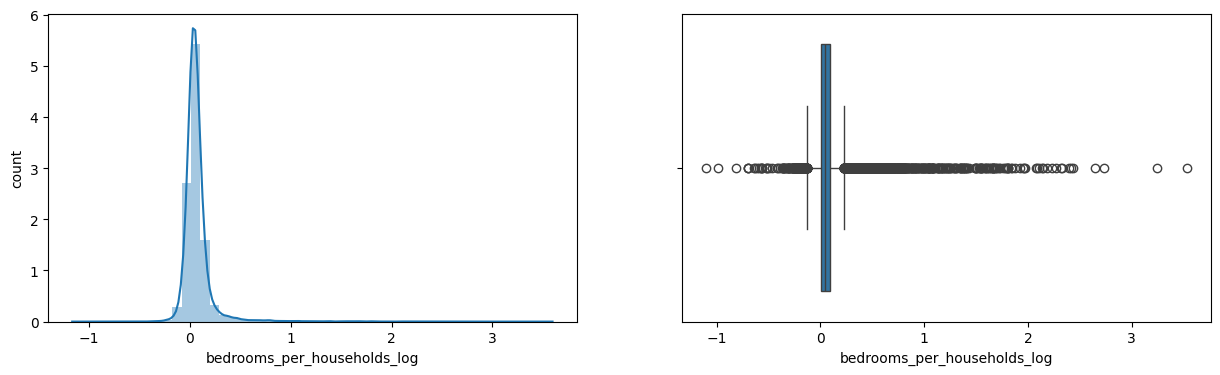

rooms_per_households_log
Skew : 0.87


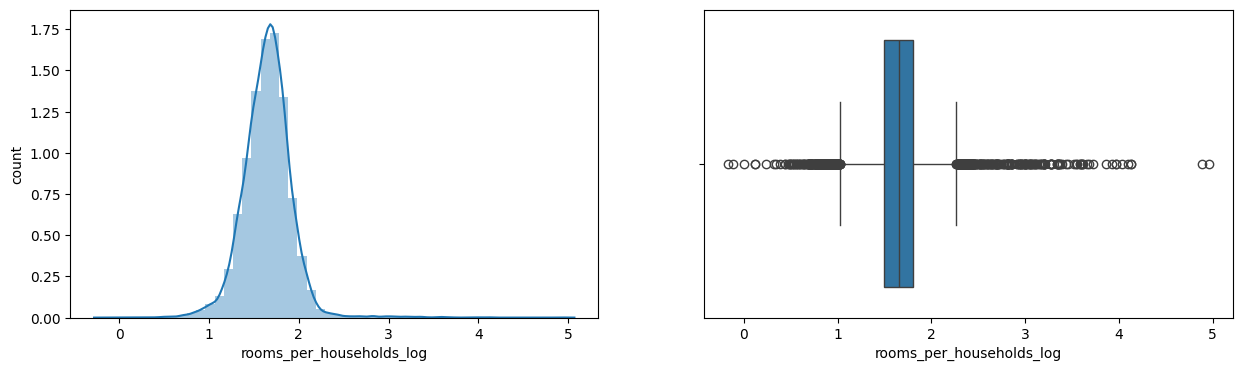

population_per_household_log
Skew : 2.13


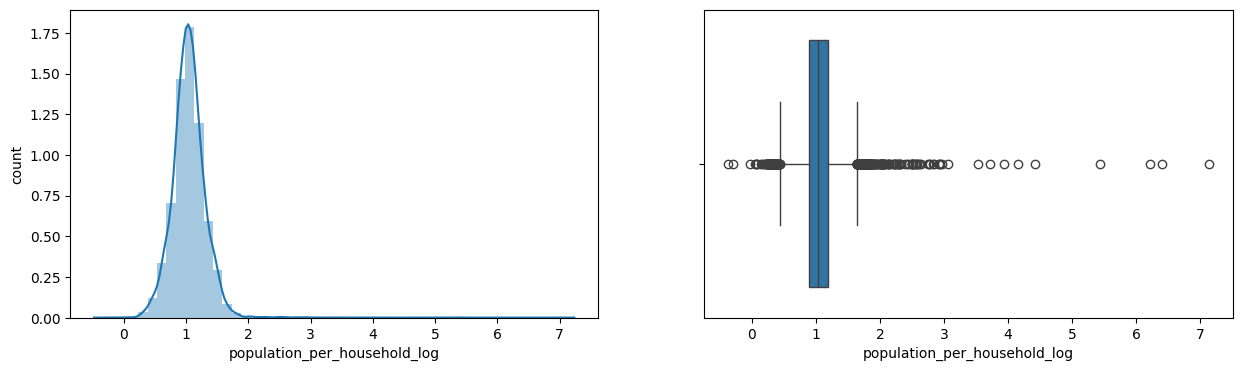

In [ ]:
plot_log_transformed(train_df, numeric_features[-3:])

##### Final Data and Splitting

In [ ]:
num_std_features = ['longitude', 'latitude', 'housing_median_age']
num_robust_features = ['total_rooms', 'population', 'households', 'median_income', 'rooms_per_households_log', 'population_per_household_log']
num_imp_robust_features = ['total_bedrooms', 'bedrooms_per_households_log']
cat_features = ["ocean_proximity"]
# drop_features = ["total_rooms". "total_bedrooms", "population", "households"]
target = "median_house_value"

assert set(num_std_features + num_robust_features + num_imp_robust_features + cat_features + [target]) == set(train_df.columns)

In [ ]:
# Model Selection
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

### Data Preprocessing

In [ ]:
# Preprocessing data functions and Transformers
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer

# Pipelines and Tranformers
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
# Make tranformers for each feature
num_std_transformer = make_pipeline(
    StandardScaler()
)

num_robust_transformer = make_pipeline(
    RobustScaler()
)

num_imp_robust_transformer = make_pipeline(
    SimpleImputer(strategy='median', fill_value='missing'),
    RobustScaler()
)

cat_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

In [ ]:
# Make Preprocessor
preprocessor = make_column_transformer(
    (num_std_transformer, num_std_features),
    (num_robust_transformer, num_robust_features),
    (num_imp_robust_transformer, num_imp_robust_features),
    (cat_transformer, cat_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude',
                                  'housing_median_age']),
                                ('pipeline-2',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['total_rooms', 'population', 'households',
                                  'median_income', 'rooms_per_households_log',
                                  'population_per_household_log']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='median')),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 ['total_bedrooms',
                                  'bedrooms_per_households_log']),
                                ('pipeline-4',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['ocean_proximity'])])

In [ ]:
# Apply transformations
transformed_X_train = pd.DataFrame(preprocessor.fit_transform(X_train))
# New Columns for OHE columns
new_cols = X_train.columns.tolist() + preprocessor.named_transformers_['pipeline-4'].get_feature_names_out().tolist()
new_cols.remove('ocean_proximity')
new_cols

NameError: name 'pd' is not defined

In [ ]:
transformed_X_train.columns = new_cols
transformed_X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_households_log,rooms_per_households_log,population_per_household_log,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.584408,1.209178,0.653374,-0.129709,-0.137986,0.899862,0.542470,-0.467912,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.734467,0.156884,1.061350,0.120872,-0.510032,-1.607500,0.999286,-0.088879,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.135991,-0.268943,-0.226994,0.276686,0.244345,-0.112981,-0.302641,-0.707905,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.415006,0.267876,-0.168712,-0.726634,-0.870412,1.162028,-0.199857,-0.166766,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,0.148300,-0.312700,-0.092025,0.003807,0.583410,-0.675157,-0.017131,0.873095,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.808883,-0.872016,0.507194,-0.468347,-0.543223,-0.592025,1.279960,0.510520,0.244802,-0.673804,-1.398952,1.0,0.0,0.0,0.0,0.0
16508,1.073144,-0.759688,0.348490,0.559789,0.625400,0.119632,-0.224702,0.879782,1.086061,0.379729,2.137142,0.0,1.0,0.0,0.0,0.0
16509,0.599469,-0.755007,0.586545,-0.016413,0.628602,0.358896,-0.277094,-0.883476,0.558621,0.376874,0.320513,1.0,0.0,0.0,0.0,0.0
16510,-1.185540,0.906510,-1.079841,0.847597,0.651014,0.457055,0.985010,0.648387,0.401984,0.456817,0.198095,1.0,0.0,0.0,0.0,0.0


### Model Building

In [ ]:
# @title Change Scoring Metric
scoring_metric = "neg_mean_absolute_error"
# scoring_metric = "neg_mean_squared_error"
# scoring_metric = "r2"
# scoring_metric = "neg_root_mean_squared_error"

In [ ]:
results_dict = {}  # dictionary to store all the results

In [ ]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [ ]:
# Baseline model
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True, scoring=scoring_metric
)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
dummy,0.038 (+/- 0.008),0.011 (+/- 0.002),-91394.675 (+/- 948.272),-91390.735 (+/- 302.188)


In [ ]:
# @title Regressor Hyper-parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression hyperparameters
linear_params = {}

# Ridge Regression hyperparameters
ridge_params = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0]
}

# Decision Tree Regression hyperparameters
dt_params = {
    'decisiontreeregressor__max_depth': [None, 5, 10],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],
    'decisiontreeregressor__min_samples_leaf': [1, 2, 4]
}

# Random Forest Regression hyperparameters
rf_params = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['sqrt', 'log2']

}

# Support Vector Regression hyperparameters
svr_params = {
    'svr__C': [0.1, 1.0, 10.0],
    "svr__gamma": [0.1, 1.0, 10],
    'svr__kernel': ['linear', 'rbf'],
    'svr__epsilon': [0.1, 0.2, 0.3]
}

# Gradient Boosting Regression hyperparameters
gb_params = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__learning_rate': [0.01, 0.1, 1.0],
    'gradientboostingregressor__max_depth': [3, 5, 7],
    'gradientboostingregressor__subsample': [0.5, 0.8, 1.0]
}

# Bagging Regressor hyperparameters
bagging_params = {
    'baggingregressor__n_estimators': [10, 50, 100],
    'baggingregressor__max_samples': [0.5, 0.8, 1.0],
    'baggingregressor__max_features': [0.5, 0.8, 1.0],
    'baggingregressor__bootstrap': [True, False],
    'baggingregressor__bootstrap_features': [True, False]
}

In [ ]:
# @title Regression Pipelines
# Create the regression pipelines
linear = make_pipeline(preprocessor, LinearRegression())
ridge = make_pipeline(preprocessor, Ridge())
dt = make_pipeline(preprocessor, DecisionTreeRegressor())
rf = make_pipeline(preprocessor, RandomForestRegressor())
# svr = make_pipeline(preprocessor, SVR())
bagging = make_pipeline(preprocessor, BaggingRegressor())
gb = make_pipeline(preprocessor, GradientBoostingRegressor())

In [ ]:
# @title Grid Search Objects
# Make grid search objects
linear_GS = GridSearchCV(
    linear, linear_params, cv=5, n_jobs=-1, return_train_score=True
)
ridge_GS = GridSearchCV(
    ridge, ridge_params, cv=5, n_jobs=-1, return_train_score=True
)
dt_GS = GridSearchCV(
    dt, dt_params, cv=5, n_jobs=-1, return_train_score=True
)
rf_RS = RandomizedSearchCV(
    rf, rf_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)
# svr_RS = RandomizedSearchCV(
#     svr, svr_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 1
# )
bagging_RS = RandomizedSearchCV(
    bagging, bagging_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)
gb_RS = RandomizedSearchCV(
    gb, gb_params, cv=5, n_jobs=-1, return_train_score=True, n_iter = 2
)

In [ ]:
# @title Linear
# CV results for Linear
linear_relevant = [
    "mean_test_score",
    "mean_train_score",
    "mean_fit_time",
    "rank_test_score",
]
linear_GS.fit(X_train, y_train)
linear_results = pd.DataFrame(linear_GS.cv_results_)[linear_relevant].set_index("rank_test_score").sort_index()
linear_results.T

rank_test_score,1
mean_test_score,0.672875
mean_train_score,0.674086
mean_fit_time,0.069006


In [ ]:
# @title Ridge
# CV results for Ridge
ridge_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_ridge__alpha",
    "mean_fit_time",
    "rank_test_score",
]
ridge_GS.fit(X_train, y_train)
ridge_results = pd.DataFrame(ridge_GS.cv_results_)[ridge_relevant].set_index("rank_test_score").sort_index()
ridge_results.T

rank_test_score,1,2,3,4
mean_test_score,0.672888,0.672878,0.672875,0.672812
mean_train_score,0.674075,0.674086,0.674086,0.673933
param_ridge__alpha,1.0,0.1,0.01,10.0
mean_fit_time,0.061647,0.064256,0.07286,0.061004


In [ ]:
# @title DTs
# CV results for DTs
dt_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_decisiontreeregressor__max_depth",
    "param_decisiontreeregressor__min_samples_leaf",
    "param_decisiontreeregressor__min_samples_split",
    "mean_fit_time",
    "rank_test_score",
]
dt_GS.fit(X_train, y_train)
dt_results = pd.DataFrame(dt_GS.cv_results_)[dt_relevant].set_index("rank_test_score").sort_index()
dt_results.T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
mean_test_score,0.727433,0.726624,0.726531,0.721548,0.718327,0.716608,0.714502,0.713954,0.709377,0.696381,...,0.66163,0.661553,0.661277,0.660416,0.660026,0.659949,0.652157,0.648768,0.640855,0.622999
mean_train_score,0.838363,0.840039,0.840095,0.841163,0.847573,0.848689,0.842826,0.848628,0.851486,0.92444,...,0.681877,0.681877,0.681854,0.682497,0.682497,0.682497,0.970824,0.977212,0.983436,1.0
param_decisiontreeregressor__max_depth,10,10,10,10,10,10,10,10,10,None,...,5,5,5,5,5,5,None,None,None,None
param_decisiontreeregressor__min_samples_leaf,4,4,4,2,2,2,1,1,1,4,...,2,2,2,1,1,1,2,2,1,1
param_decisiontreeregressor__min_samples_split,10,2,5,10,5,2,10,5,2,10,...,5,10,2,10,2,5,5,2,5,2
mean_fit_time,0.357715,0.286311,0.357011,0.331889,0.276604,0.278702,0.714736,0.789401,0.546891,1.20356,...,0.310041,0.412059,0.35078,0.392071,0.525546,0.375732,0.635529,0.639626,1.190811,0.660096


In [ ]:
# @title RFs
# CV results for RFs
rf_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_randomforestregressor__n_estimators",
    "param_randomforestregressor__max_depth",
    "param_randomforestregressor__min_samples_leaf",
    "param_randomforestregressor__min_samples_split",
    "param_randomforestregressor__max_features",
    "mean_fit_time",
    "rank_test_score",
]
rf_RS.fit(X_train, y_train)
rf_results = pd.DataFrame(rf_RS.cv_results_)[rf_relevant].set_index("rank_test_score").sort_index()
rf_results.T

rank_test_score,1,2
mean_test_score,0.675313,0.670194
mean_train_score,0.68826,0.682949
param_randomforestregressor__n_estimators,100,100
param_randomforestregressor__max_depth,5,5
param_randomforestregressor__min_samples_leaf,1,2
param_randomforestregressor__min_samples_split,10,5
param_randomforestregressor__max_features,sqrt,log2
mean_fit_time,4.686939,3.49571


In [ ]:
# @title Bagging
# CV results for Bagging
bagging_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_baggingregressor__n_estimators",
    "param_baggingregressor__max_samples",
    "param_baggingregressor__max_features",
    "param_baggingregressor__bootstrap",
    "param_baggingregressor__bootstrap_features",
    "mean_fit_time",
    "rank_test_score",
]
bagging_RS.fit(X_train, y_train)
bagging_results = pd.DataFrame(bagging_RS.cv_results_)[bagging_relevant].set_index("rank_test_score").sort_index()
bagging_results.T

rank_test_score,1,2
mean_test_score,0.806374,0.655422
mean_train_score,0.972194,1.0
param_baggingregressor__n_estimators,50,100
param_baggingregressor__max_samples,1.0,1.0
param_baggingregressor__max_features,1.0,1.0
param_baggingregressor__bootstrap,True,False
param_baggingregressor__bootstrap_features,False,False
mean_fit_time,27.093637,79.881296


In [ ]:
# @title GB
# CV results for GBR
gb_relevant = [
    "mean_test_score",
    "mean_train_score",
    "param_gradientboostingregressor__n_estimators",
    "param_gradientboostingregressor__learning_rate",
    "param_gradientboostingregressor__max_depth",
    "param_gradientboostingregressor__subsample",
    "mean_fit_time",
    "rank_test_score",
]
gb_RS.fit(X_train, y_train)
gb_results = pd.DataFrame(gb_RS.cv_results_)[gb_relevant].set_index("rank_test_score").sort_index()
gb_results.T

rank_test_score,1,2
mean_test_score,0.829558,0.817475
mean_train_score,0.973767,0.858974
param_gradientboostingregressor__n_estimators,300,300
param_gradientboostingregressor__learning_rate,0.1,0.1
param_gradientboostingregressor__max_depth,7,3
param_gradientboostingregressor__subsample,0.5,1.0
mean_fit_time,37.299393,36.535485


In [ ]:
# @title SVR
# CV results for SVR
# svr_relevant = [
#     "mean_test_score",
#     "mean_train_score",
#     "param_svr__C",
#     "param_svr__gamma",
#     "param_svr__kernel",
#     "param_svr__epsilon",
#     "mean_fit_time",
#     "rank_test_score",
# ]
# svr_RS.fit(X_train, y_train)
# svr_results = pd.DataFrame(svr_RS.cv_results_)[svr_relevant].set_index("rank_test_score").sort_index()
# svr_results.T

In [ ]:
# @title Best Model based on R2 score with tuned hyperparameters
print(f"The best score is {linear_GS.best_score_} and the best parameters are {linear_GS.best_params_}")
print(f"The best score is {ridge_GS.best_score_} and the best parameters are {ridge_GS.best_params_}")
print(f"The best score is {dt_GS.best_score_} and the best parameters are {dt_GS.best_params_}")
print(f"The best score is {rf_RS.best_score_} and the best parameters are {rf_RS.best_params_}")
# print(f"The best score is {svr_RS.best_score_} and the best parameters are {svr_RS.best_params_}")
print(f"The best score is {bagging_RS.best_score_} and the best parameters are {bagging_RS.best_params_}")
print(f"The best score is {gb_RS.best_score_} and the best parameters are {gb_RS.best_params_}")

The best score is 0.6728747783958747 and the best parameters are {}
The best score is 0.6728876773138177 and the best parameters are {'ridge__alpha': 1.0}
The best score is 0.7274326136582998 and the best parameters are {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
The best score is 0.6753125060451857 and the best parameters are {'randomforestregressor__n_estimators': 100, 'randomforestregressor__min_samples_split': 10, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 5}
The best score is 0.806374084154803 and the best parameters are {'baggingregressor__n_estimators': 50, 'baggingregressor__max_samples': 1.0, 'baggingregressor__max_features': 1.0, 'baggingregressor__bootstrap_features': False, 'baggingregressor__bootstrap': True}
The best score is 0.8295584223160486 and the best parameters are {'gradientboostingregresso

### Validate Model on Test Data

In [ ]:
# @title Transformer preprocessing and evaluating model on Test Data
X_test_transformed = preprocessor.transform(X_test)

pred_linear_GS = linear_GS.predict(X_test)
pred_ridge_GS = ridge_GS.predict(X_test)
pred_dt_GS = dt_GS.predict(X_test)
pred_rf_RS = rf_RS.predict(X_test)
pred_gb_RS = gb_RS.predict(X_test)
pred_bagging_RS = bagging_RS.predict(X_test)
# pred_svr_RS = svr_RS.predict(X_test)

In [ ]:
# @title MSE for test data
linear_mse = mean_squared_error(y_test, pred_linear_GS)
ridge_mse = mean_squared_error(y_test, pred_ridge_GS)
dt_mse = mean_squared_error(y_test, pred_dt_GS)
rf_mse = mean_squared_error(y_test, pred_rf_RS)
gb_mse = mean_squared_error(y_test, pred_gb_RS)
bagging_mse = mean_squared_error(y_test, pred_bagging_RS)
# svr_mse = mean_squared_error(y_test, pred_svr_RS)

In [ ]:
# @title R2 score on Test Data
linear_r2 = r2_score(y_test, pred_linear_GS)
ridge_r2 = r2_score(y_test, pred_ridge_GS)
dt_r2 = r2_score(y_test, pred_dt_GS)
rf_r2 = r2_score(y_test, pred_rf_RS)
gb_r2 = r2_score(y_test, pred_gb_RS)
bagging_r2 = r2_score(y_test, pred_bagging_RS)
# svr_r2 = r2_score(y_test, pred_svr_RS)

In [ ]:
# @title Default title text
print("Mean Standard Error:")
print("Linear Regression mse Score:", linear_mse)
print("Ridge Regression mse Score:", ridge_mse)
print("Decision Tree Regression mse Score:", dt_mse)
print("Random Forest Regression mse Score:", rf_mse)
print("Gradient Boosting Regression mse Score:", gb_mse)
print("Bagging Regression mse Score:", bagging_mse)
# print("Support Vector Regression mse Score:", svr_mse)
print("\n")
print("R2 Score:")
print("Linear Regression r2 Score:", linear_r2)
print("Ridge Regression r2 Score:", ridge_r2)
print("Decision Tree Regression r2 Score:", dt_r2)
print("Random Forest Regression r2 Score:", rf_r2)
print("Gradient Boosting Regression r2 Score:", gb_r2)
print("Bagging Regression r2 Score:", bagging_r2)
# print("Support Vector Regression r2 Score:", svr_r2)

Mean Standard Error:
Linear Regression mse Score: 4500404209.03565
Ridge Regression mse Score: 4501055132.435897
Decision Tree Regression mse Score: 3644832096.772991
Random Forest Regression mse Score: 4433987913.853329
Gradient Boosting Regression mse Score: 2113865934.590356
Bagging Regression mse Score: 2525915830.6545577


R2 Score:
Linear Regression r2 Score: 0.6565649134152746
Ridge Regression r2 Score: 0.6565152401139576
Decision Tree Regression r2 Score: 0.7218553781838526
Random Forest Regression r2 Score: 0.6616332772837425
Gradient Boosting Regression r2 Score: 0.8386865497954675
Bagging Regression r2 Score: 0.8072421760994525


In [ ]:
train_df, test_df = train_test_split(housing_data, test_size=0.2, random_state= 42)